In [1]:
# Imports
import  pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Consts
PATH_DATASET1 = "../data/spamham.csv"
PATH_DATASET2 = "../data/spam_or_not_spam.csv"
HEADER_NAMES = ["text", "is_spam"]

# Load data to dataframe
df_dataset1 = pd.read_csv(PATH_DATASET1, names=HEADER_NAMES, header=None).dropna()
df_dataset2 = pd.read_csv(PATH_DATASET2, names=HEADER_NAMES, header=None).dropna()

# Print loaded data
print("First dataset form {0}: \n {1}\n\n\n".format(PATH_DATASET1, df_dataset1))
print("Second dataset form {0}: \n {1}\n\n\n".format(PATH_DATASET2, df_dataset2))


First dataset form ../data/spamham.csv: 
                                                    text  is_spam
0     Subject: naturally irresistible your corporate...        1
1     Subject: the stock trading gunslinger  fanny i...        1
2     Subject: unbelievable new homes made easy  im ...        1
3     Subject: 4 color printing special  request add...        1
4     Subject: do not have money , get software cds ...        1
...                                                 ...      ...
5723  Subject: re : research and development charges...        0
5724  Subject: re : receipts from visit  jim ,  than...        0
5725  Subject: re : enron case study update  wow ! a...        0
5726  Subject: re : interest  david ,  please , call...        0
5727  Subject: news : aurora 5 . 2 update  aurora ve...        0

[5728 rows x 2 columns]



Second dataset form ../data/spam_or_not_spam.csv: 
                                                    text  is_spam
0      date wed NUMBER aug NUMBER

In [2]:
def create_dict(df_org, char=' '):
    """
    Split text data to numpy array and create column with words count dictionary

    :param df_org: dataframe with text column
    :param char: split text by this character
    :return: dataframe with dict and splited text
    """

    df = df_org.copy()
    # split by char
    df[HEADER_NAMES[0]] = df[HEADER_NAMES[0]].apply(lambda text: np.array(text.split(char)))
    df["dict"] = df[HEADER_NAMES[0]].apply(lambda text: dict(zip(np.unique(text, return_counts=True)[0],
                                                                 np.unique(text, return_counts=True)[1])))
    return df

def concat_dict(df):
    """
    Calc dict with add up all words from dataframe

    :param df: dataframe with dict column
    :return: return merged dict with all words and their count
    """
    return dict((df["dict"].apply(lambda x: Counter(x))).sum())

In [3]:
df_dict1 = create_dict(df_dataset1)
df_dict2 = create_dict(df_dataset2)

dict1 = concat_dict(df_dict1)
dict2 = concat_dict(df_dict2)

Number of words in 1 dataset: 37442
Number of words in 2 dataset: 34223
[('', 177976), ('-', 105222), ('.', 92494), (',', 61143), ('the', 50110), (':', 42370), ('to', 41736), ('/', 40311), ('and', 27478), ('of', 23757), ('>', 22252), ('a', 19945), ('you', 19154), ('in', 17975), ('i', 17421), ('_', 17234), ('for', 16696), ('@', 14551), ('enron', 13382), ('on', 12719), ('is', 12595), ('ect', 11418), ("'", 10809), (')', 10586), ('this', 10031), ('(', 9778), ('?', 9427), ('that', 9291), ('your', 9274), ('be', 9262), ('"', 8930), ('with', 8853), ('we', 8688), ('vince', 8532), ('will', 8127), ('*', 7790), ('have', 7556), ('at', 6882), ('from', 6746), ('it', 6688), ('are', 6521), ('s', 6506), ('as', 6175), ('Subject:', 5728), ('hou', 5577), ('by', 5512), ('com', 5442), ('or', 5218), ('if', 5193), ('!', 5175), ('am', 5035), ('please', 4967), ('2000', 4967), ('kaminski', 4770), ('not', 4575), ('subject', 4451), ('would', 4426), ('me', 4367), ('our', 4347), ('can', 4255), ('re', 3965), ('cc', 38

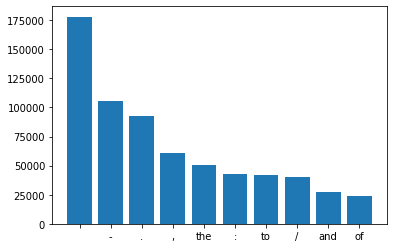

In [4]:
print("Number of words in {0} dataset: {1}".format(1, len(Counter(dict1))))
print("Number of words in {0} dataset: {1}".format(2, len(Counter(dict2))))
max_values = Counter(dict1).most_common(len(Counter(dict1)))
print(max_values)

# Plot number of words
plot_dict = dict(max_values[0:10])
plt.bar(list(plot_dict.keys()), list(plot_dict.values()))
plt.show()


#TODO: set spam and non-spam dataframes
#TODO: import to json
#TODO: Add dict with word to delete
#TODO: add print functions
